In [35]:
import numpy as np
import pandas as pd

from keras.utils import to_categorical


np.random.seed(10)

In [36]:
from keras.datasets import mnist

In [37]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [6]:
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))

train data= 60000
test data= 10000


In [38]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [39]:
print('x_test_image:', x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


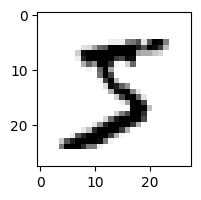

5

In [40]:
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf() 
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
plot_image(x_train_image[0])
y_train_label[0]

In [41]:
def plot_images_labels_prediction(images, labels,
                                 prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title += ",predict=" + str(prediction[idx])
    
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

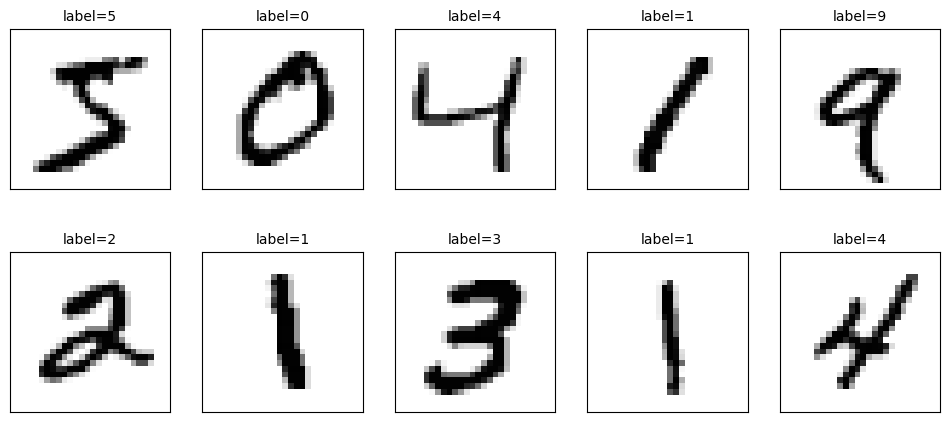

In [42]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, num=10)

In [43]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [44]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [45]:
print('x_Train:', x_Train.shape)
print('x_Test:', x_Test.shape)

x_Train: (60000, 784)
x_Test: (10000, 784)


In [46]:
x_test_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [47]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [48]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [50]:
y_train_label = to_categorical(y_train_label, 10)
y_test_label = to_categorical(y_test_label, 10)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [62]:
model = Sequential()
model.add(Flatten(input_shape=x_Train.shape[1:]))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

score = model.evaluate(x_Test_normalize, y_test_label, verbose=0)
accuracy = 100*score[1]

In [63]:
def show_train_history(train_history):#(train = 'accuracy', validation = 'val_accuracy'):
    plt.figure(figsize = (10,10)) # change figure size
    plt.plot( train_history.history['accuracy'] )
    plt.plot( train_history.history['val_accuracy'] )
    plt.title('train history')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')

    plt.plot( train_history.history['loss'] )
    plt.plot( train_history.history['val_loss'] )
    plt.title('train history')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accuracy','validation_val_accuracy','train_loss','validation_val_loss'],loc = 'upper left')

    plt.show

Epoch 1/10
240/240 - 2s - loss: 1.5385 - accuracy: 0.6183 - val_loss: 0.8281 - val_accuracy: 0.8382 - 2s/epoch - 8ms/step
Epoch 2/10
240/240 - 2s - loss: 0.7177 - accuracy: 0.8214 - val_loss: 0.4927 - val_accuracy: 0.8796 - 2s/epoch - 6ms/step
Epoch 3/10
240/240 - 1s - loss: 0.5286 - accuracy: 0.8556 - val_loss: 0.3984 - val_accuracy: 0.8954 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 2s - loss: 0.4563 - accuracy: 0.8707 - val_loss: 0.3545 - val_accuracy: 0.9022 - 2s/epoch - 7ms/step
Epoch 5/10
240/240 - 2s - loss: 0.4139 - accuracy: 0.8826 - val_loss: 0.3278 - val_accuracy: 0.9077 - 2s/epoch - 7ms/step
Epoch 6/10
240/240 - 2s - loss: 0.3858 - accuracy: 0.8901 - val_loss: 0.3081 - val_accuracy: 0.9128 - 2s/epoch - 7ms/step
Epoch 7/10
240/240 - 2s - loss: 0.3631 - accuracy: 0.8950 - val_loss: 0.2939 - val_accuracy: 0.9143 - 2s/epoch - 6ms/step
Epoch 8/10
240/240 - 2s - loss: 0.3478 - accuracy: 0.9000 - val_loss: 0.2813 - val_accuracy: 0.9183 - 2s/epoch - 6ms/step
Epoch 9/10
240/240 - 1s 

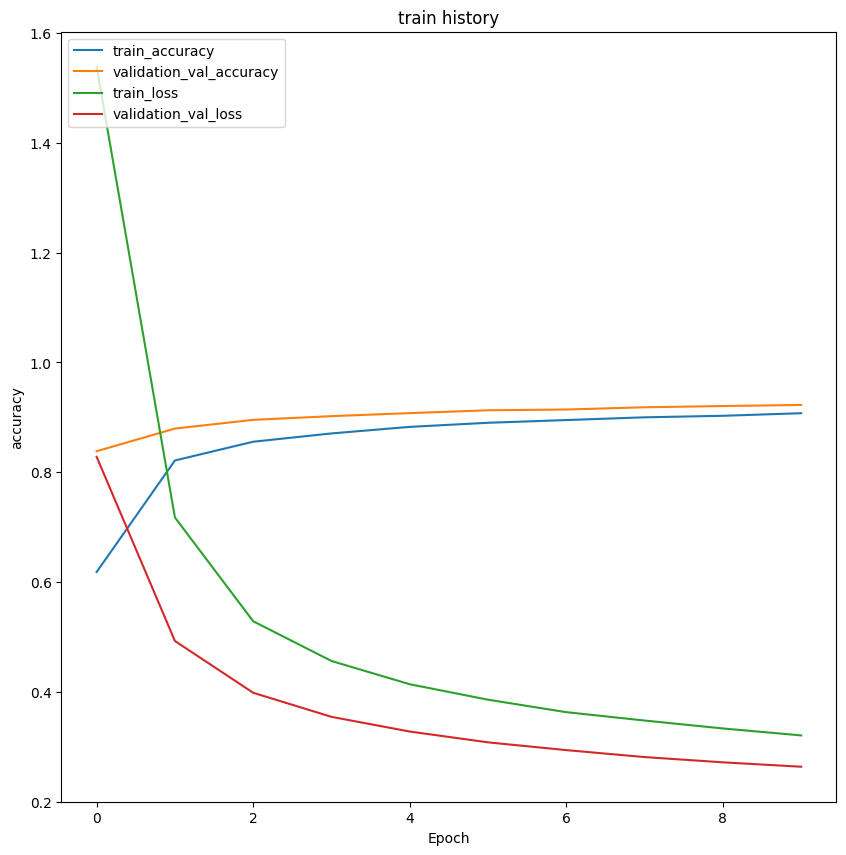

In [64]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_train_label,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

show_train_history(train_history)

model.save('firstmodel.h5')

score = model.evaluate(x_Test_normalize, y_test_label, verbose=0)

accuracy = 100 * score[1]
print('The final accuracy of model is %.4f%%' % accuracy)

In [81]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25

    # Set the spacing between subplots
    plt.subplots_adjust(hspace=0.6, wspace=0.4)

    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')

        title = "label={}\npredict={}".format(labels[idx], prediction[idx])
        ax.set_title(title, fontsize=6)
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])  # Clear x-axis tick labels
        ax.set_yticklabels([])  # Clear y-axis tick labels

        # Rotate x-axis tick labels
        ax.tick_params(axis='x', labelrotation=45)

        idx += 1

    plt.show()

313/313 [==============================] - 0s 844us/step


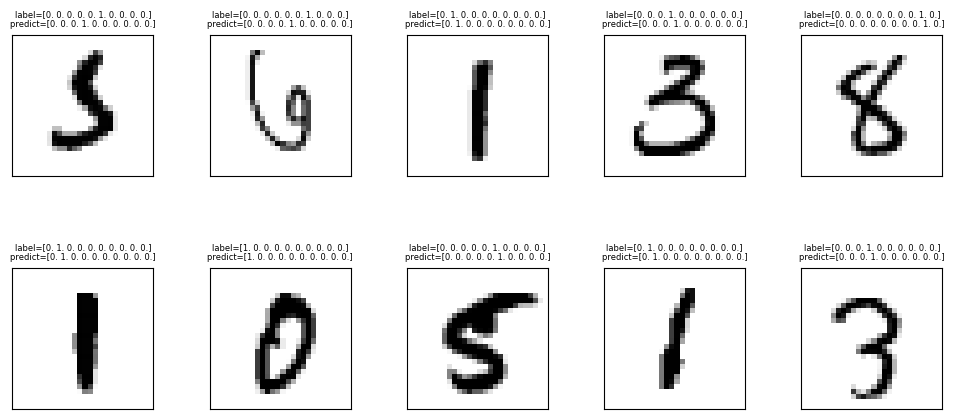

In [92]:
prediction = (model.predict(x_Test))

plot_images_labels_prediction(x_test_image, 
                              y_test_label,
                              prediction,
                              idx=340)


In [93]:
print(y_test_label)
print(prediction)

# datatab = pd.crosstab(y_test_label, prediction,
#                       rownames=['label'], colnames=['predict'])
# print(datatab)

# df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
# print(df[:2])
# print(df[(df.label == 5) & (df.predict == 3)])

# plot_images_labels_prediction(x_test_image, y_test_label,
#                               prediction, idx=340, num=1)
# plot_images_labels_prediction(x_test_image, y_test_label,
#                               prediction, idx=1289, num=1)

AssertionError: arrays and names must have the same length